
# Limpieza y transformación de datos
Dataset: `attacks.csv` (nulos, duplicados, outliers, fechas en texto y variables categóricas).  
Objetivo: preparar los datos para modelado sin entrar aún en EDA completo.


## 1. Carga del dataset

In [159]:
# Importación de librerías necesarias
import os
import pandas as pd
import matplotlib.pyplot as plt

# Librería para visualizar valores faltantes
import missingno as msno

In [160]:
!pip install missingno

In [161]:
print("Directorio actual:", os.getcwd())

Directorio actual: /home/neo/PROJECTS/IronHack_Esp_Big_Data/11_dia/exercises


In [162]:
def load_data(filename: str) -> pd.DataFrame | None:
    """
    Carga un archivo CSV en un DataFrame de pandas desde '../resources/docs',
    manejando errores y codificaciones comunes.
    """
    try:
        base_dir = os.getcwd()
        file_path = os.path.join(base_dir, "..", "resources", "docs", filename)

        if not os.path.exists(file_path):
            raise FileNotFoundError(f"El archivo {file_path} no existe.")

        # Intentar cargar con UTF-8 primero, si falla usar latin-1
        try:
            data = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            data = pd.read_csv(file_path, encoding='latin-1')

        print(f">>> El archivo '{filename}' se cargó correctamente. Filas: {data.shape[0]}, Columnas: {data.shape[1]}")
        return data

    except FileNotFoundError as e:
        print(e)
    except pd.errors.ParserError as e:
        print(f"Error de formato: {e}")
    except Exception as e:
        print(f"Ocurrió un error inesperado: {e}")

    return None

# Cargar el archivo
df = load_data("attacks.csv")

if df is not None:
    print("DataFrame: {df} OK...")

>>> El archivo 'attacks.csv' se cargó correctamente. Filas: 25723, Columnas: 24
DataFrame: {df} OK...


In [163]:
def missing_values(df: pd.DataFrame) -> pd.DataFrame:
    n_cases = df.shape[0]
    summary = pd.DataFrame({
        'variable': df.columns,
        'n_cases': n_cases,
        'n_missing': df.isna().sum().values,
        'pct_missing': (df.isna().sum().values / n_cases * 100)
    })
    return summary

# Carga un Dataframe con los valores nulos de cada columna
df_missing = missing_values(df)

In [164]:
def plot_missing_data(df: pd.DataFrame, figsize_bar=(12,5), figsize_matrix=(12,5)):
    """
    Genera gráficos de valores faltantes de un DataFrame usando Missingno:
    - Bar chart
    - Matrix
    """
    
    # Gráfico de barras
    plt.figure(figsize=figsize_bar)
    msno.bar(df)
    plt.show()
    
    # Gráfico de matriz
    plt.figure(figsize=figsize_matrix)
    msno.matrix(df)
    plt.show()

# 2. Análisis Preliminar

In [165]:
# 2.1 Tamaño del DataFrame
print("1.Filas:   ", df.shape[0])
print("2.Columnas:", df.shape[1])

1.Filas:    25723
2.Columnas: 24


In [166]:
# 2.2 Conteo de valores
print("1.Tamaño:    ", df.size)
print("2.Nulos:     ", df.isna().sum().sum())
print("3.No Nulos:  ", df.size - df.isna().sum().sum())

1.Tamaño:     617352
2.Nulos:      488276
3.No Nulos:   129076


In [167]:
# 2.3 Contar valores nulos en cada columna
df.isnull().sum().sort_values(ascending=False)

Unnamed: 22               25722
Unnamed: 23               25721
Time                      22775
Species                   22259
Age                       22252
Sex                       19986
Activity                  19965
Location                  19961
Fatal (Y/N)               19960
Area                      19876
Name                      19631
Country                   19471
Injury                    19449
Investigator or Source    19438
Type                      19425
Year                      19423
href formula              19422
Date                      19421
Case Number.1             19421
pdf                       19421
Case Number.2             19421
href                      19421
original order            19414
Case Number               17021
dtype: int64

In [168]:
# 2.4 Registros completos con valores nulos 
num_all_na = df.isna().all(axis=1).sum()
print("Reg. completamente vacíos:", num_all_na)

Reg. completamente vacíos: 17020


In [169]:
# 2.5 Resumen por columna
print("-" * 60)
print(df_missing)

------------------------------------------------------------
                  variable  n_cases  n_missing  pct_missing
0              Case Number    25723      17021    66.170353
1                     Date    25723      19421    75.500525
2                     Year    25723      19423    75.508300
3                     Type    25723      19425    75.516075
4                  Country    25723      19471    75.694903
5                     Area    25723      19876    77.269370
6                 Location    25723      19961    77.599813
7                 Activity    25723      19965    77.615364
8                     Name    25723      19631    76.316915
9                     Sex     25723      19986    77.697003
10                     Age    25723      22252    86.506240
11                  Injury    25723      19449    75.609377
12             Fatal (Y/N)    25723      19960    77.595926
13                    Time    25723      22775    88.539439
14                Species     25723    

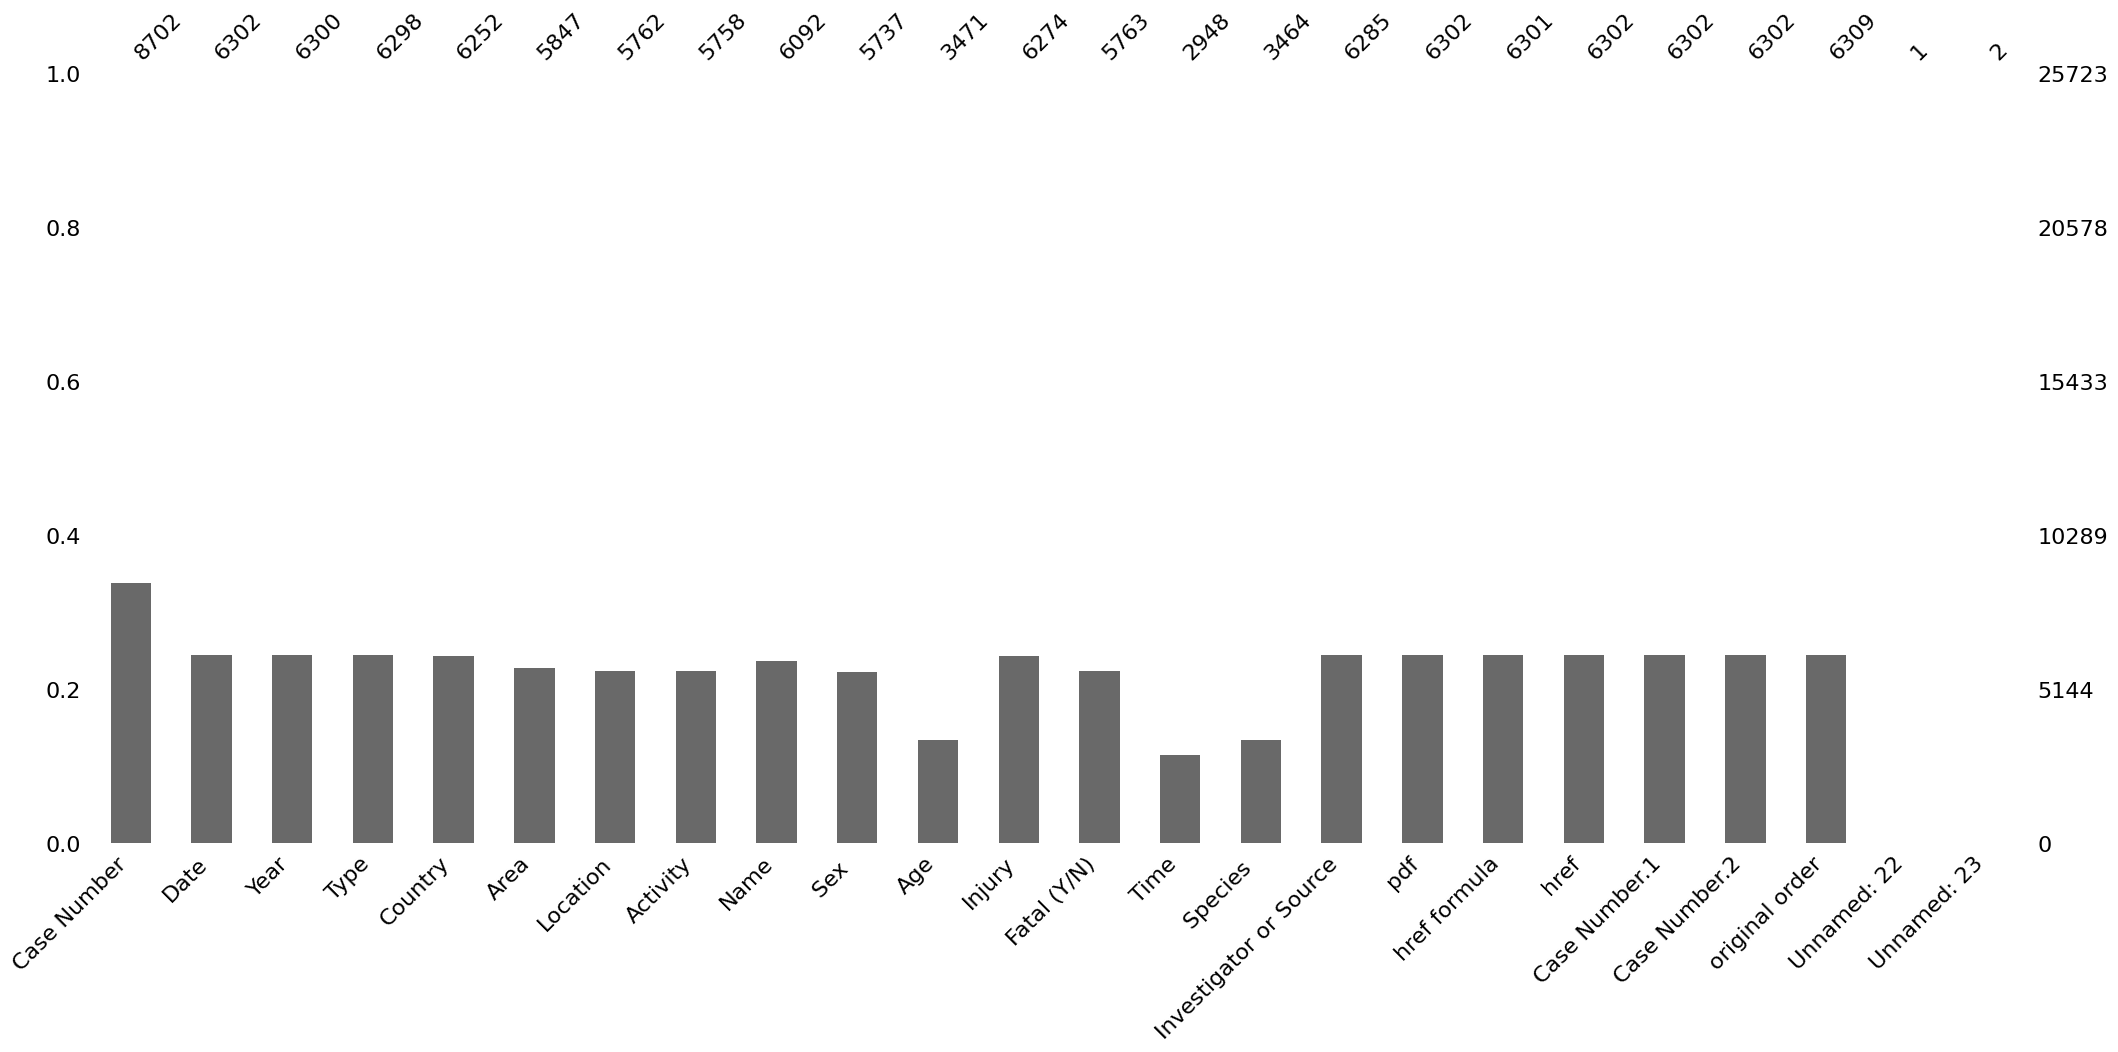

<Figure size 1200x500 with 0 Axes>

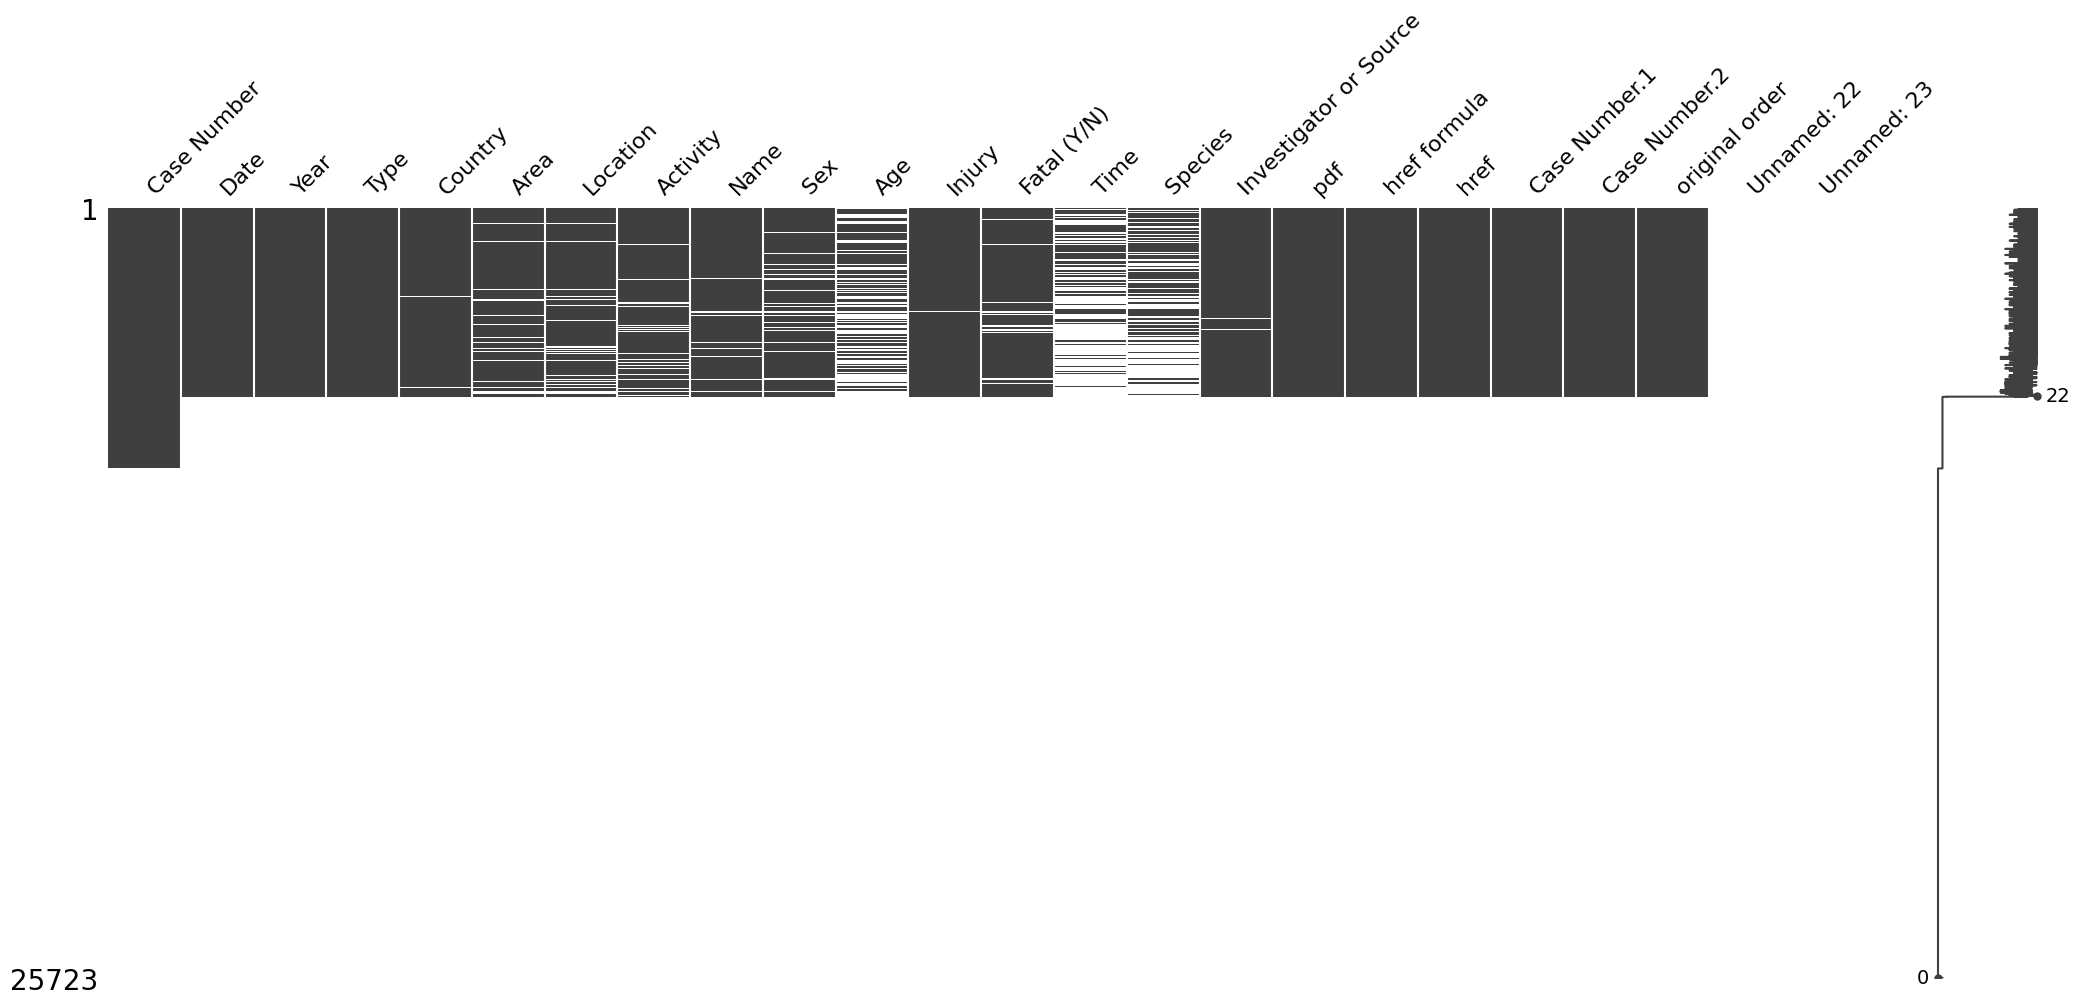

In [177]:
# ------------------------------------
# ----- Graficos de Valores faltantes
# ------------------------------------
plot_missing_data(df)

In [ ]:
# Visualizar datos
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


## 3. Limpieza

In [180]:
# Crear un DataFrame sin filas totalmente nulas
df_all_na = df[~df.isna().all(axis=1)]  # ~ = NOT → selecciona filas que NO están completamente vacías
df_all_na

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


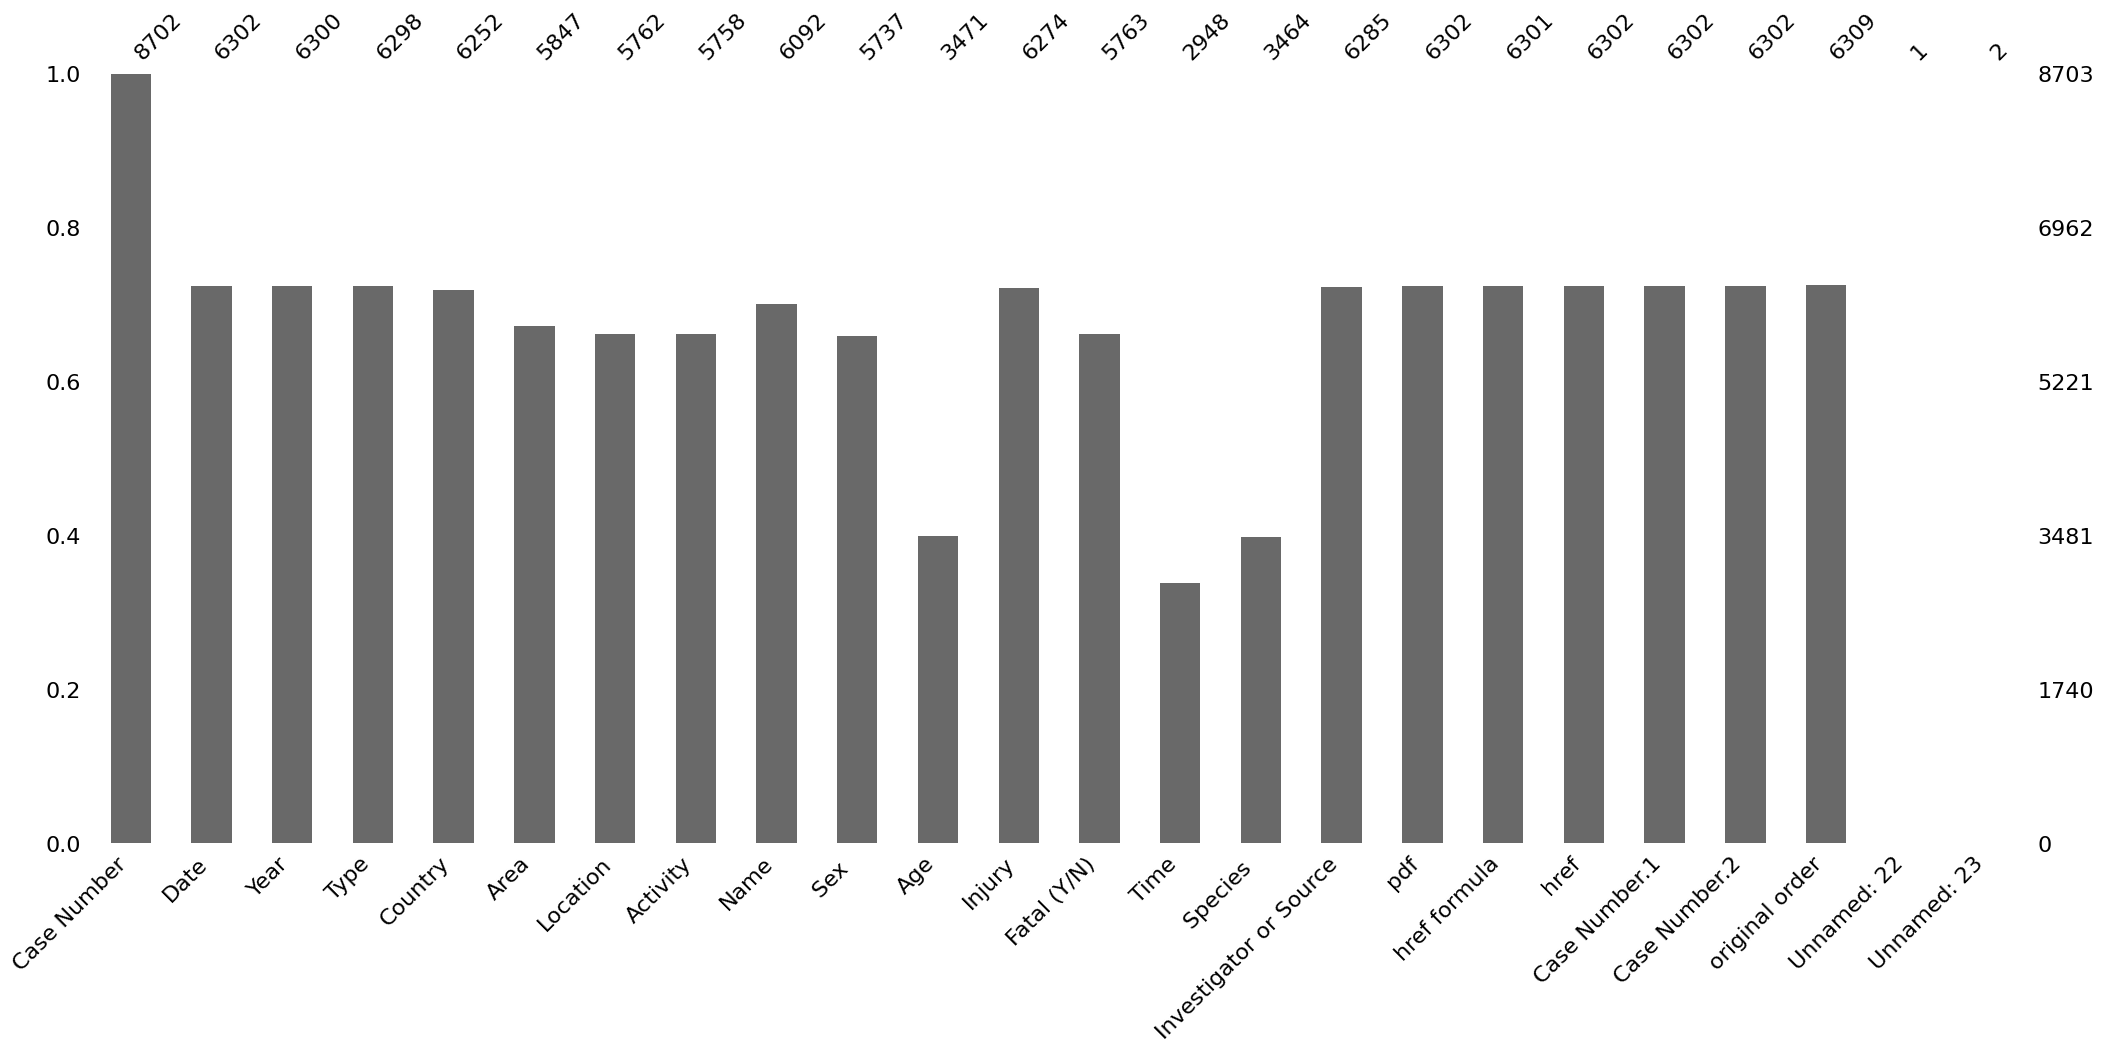

<Figure size 1200x500 with 0 Axes>

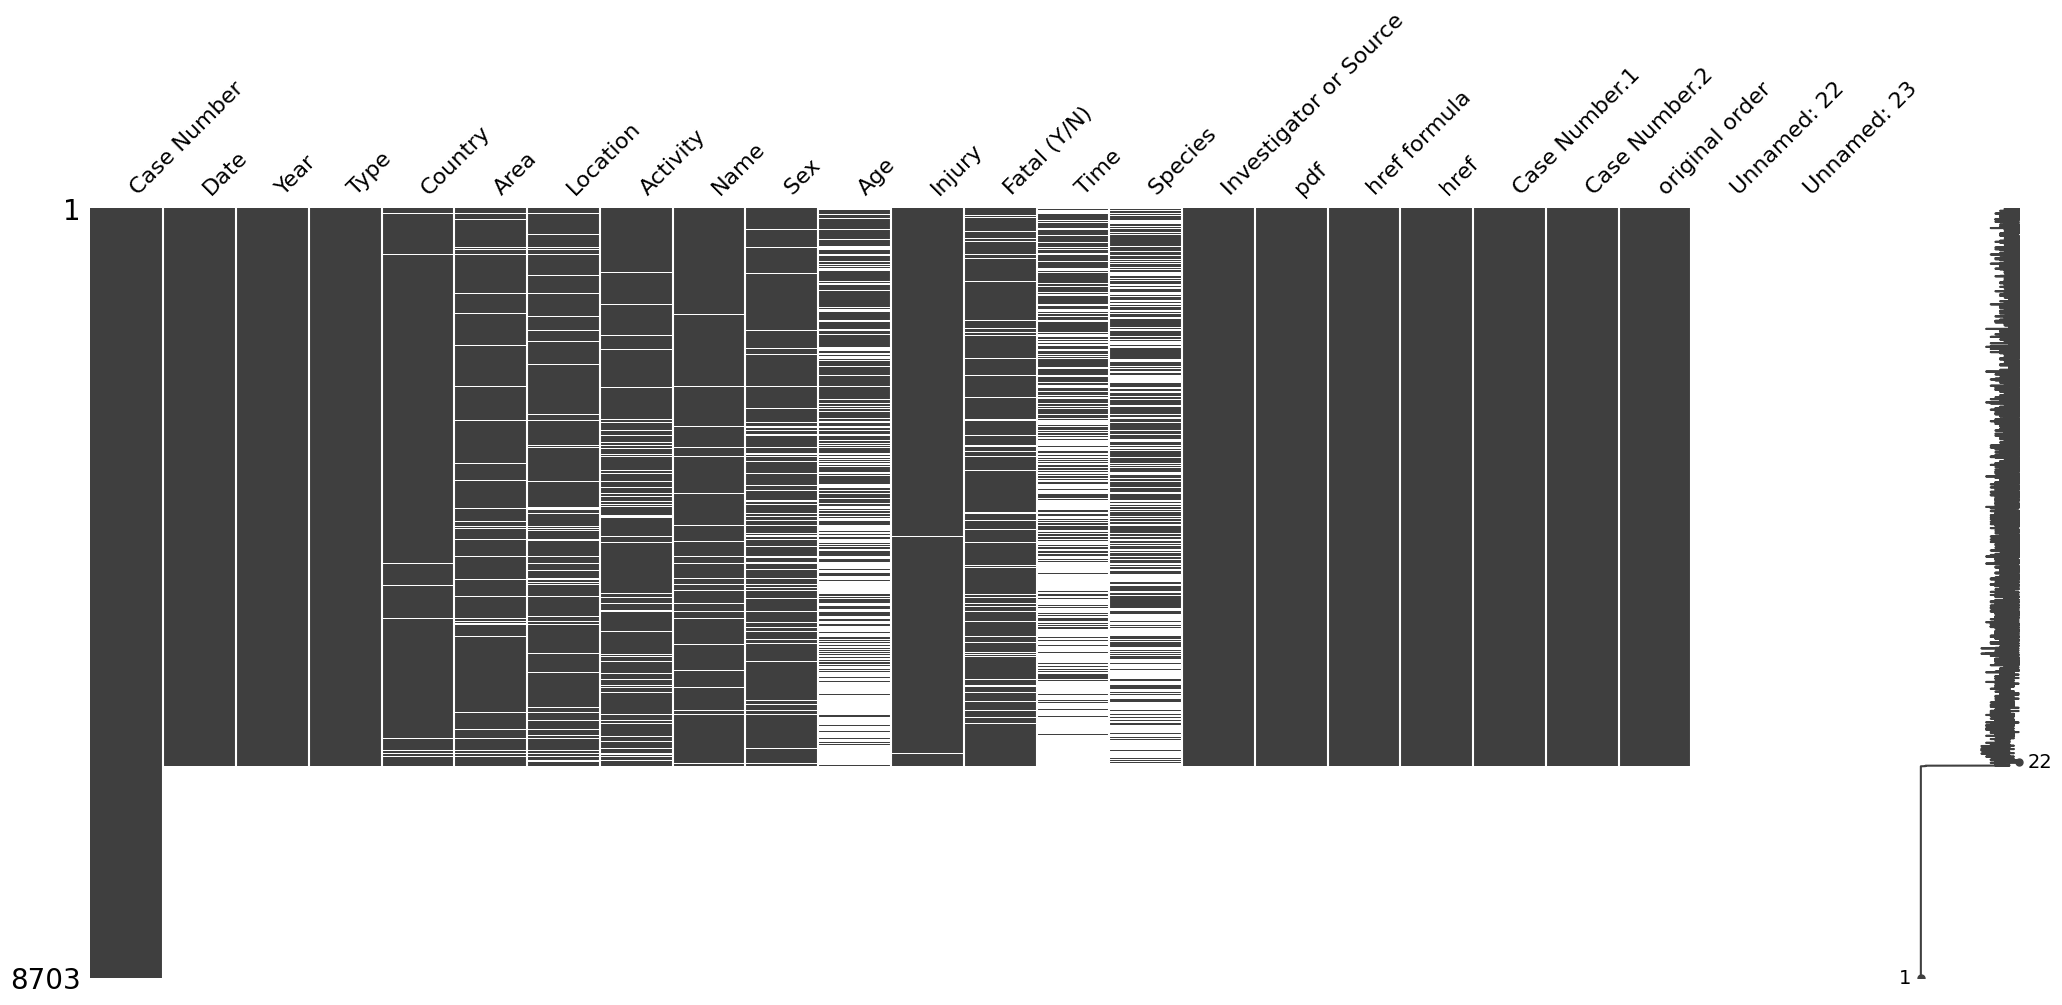

In [181]:
# Visualizar datos faltantes
plot_missing_data(df_all_na)

In [183]:
df_clean = df_all_na[~df_all_na['Date'].isna()]
missing_values(df_clean)

,variable,n_cases,n_missing,pct_missing
0,Case Number,6302,1,0.015868
1,Date,6302,0,0.000000
2,Year,6302,2,0.031736
3,Type,6302,4,0.063472
4,Country,6302,50,0.793399
5,Area,6302,455,7.219930
6,Location,6302,540,8.568708
7,Activity,6302,544,8.632180
8,Name,6302,210,3.332275
9,Sex,6302,565,8.965408


In [184]:
df_clean = df_clean.loc[:,"Case Number":"Species "]
df_clean.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


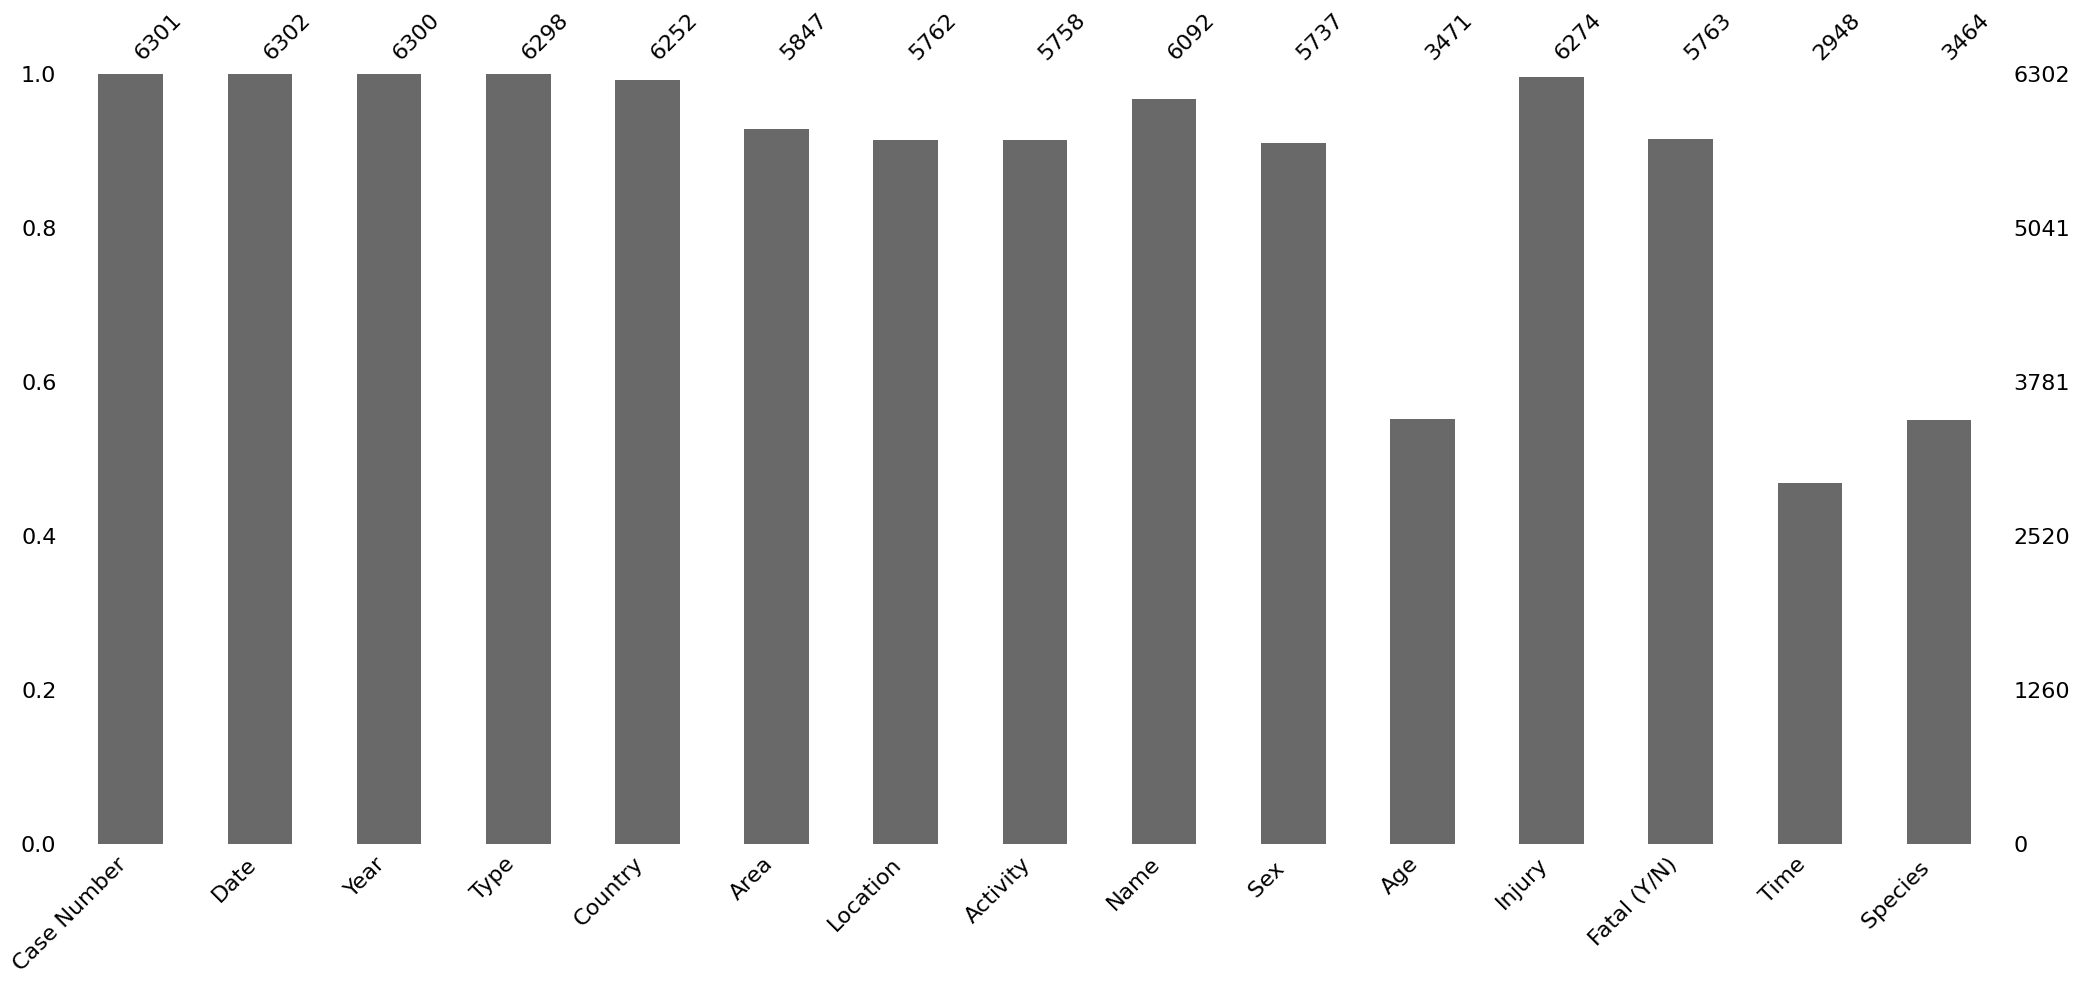

<Figure size 1200x500 with 0 Axes>

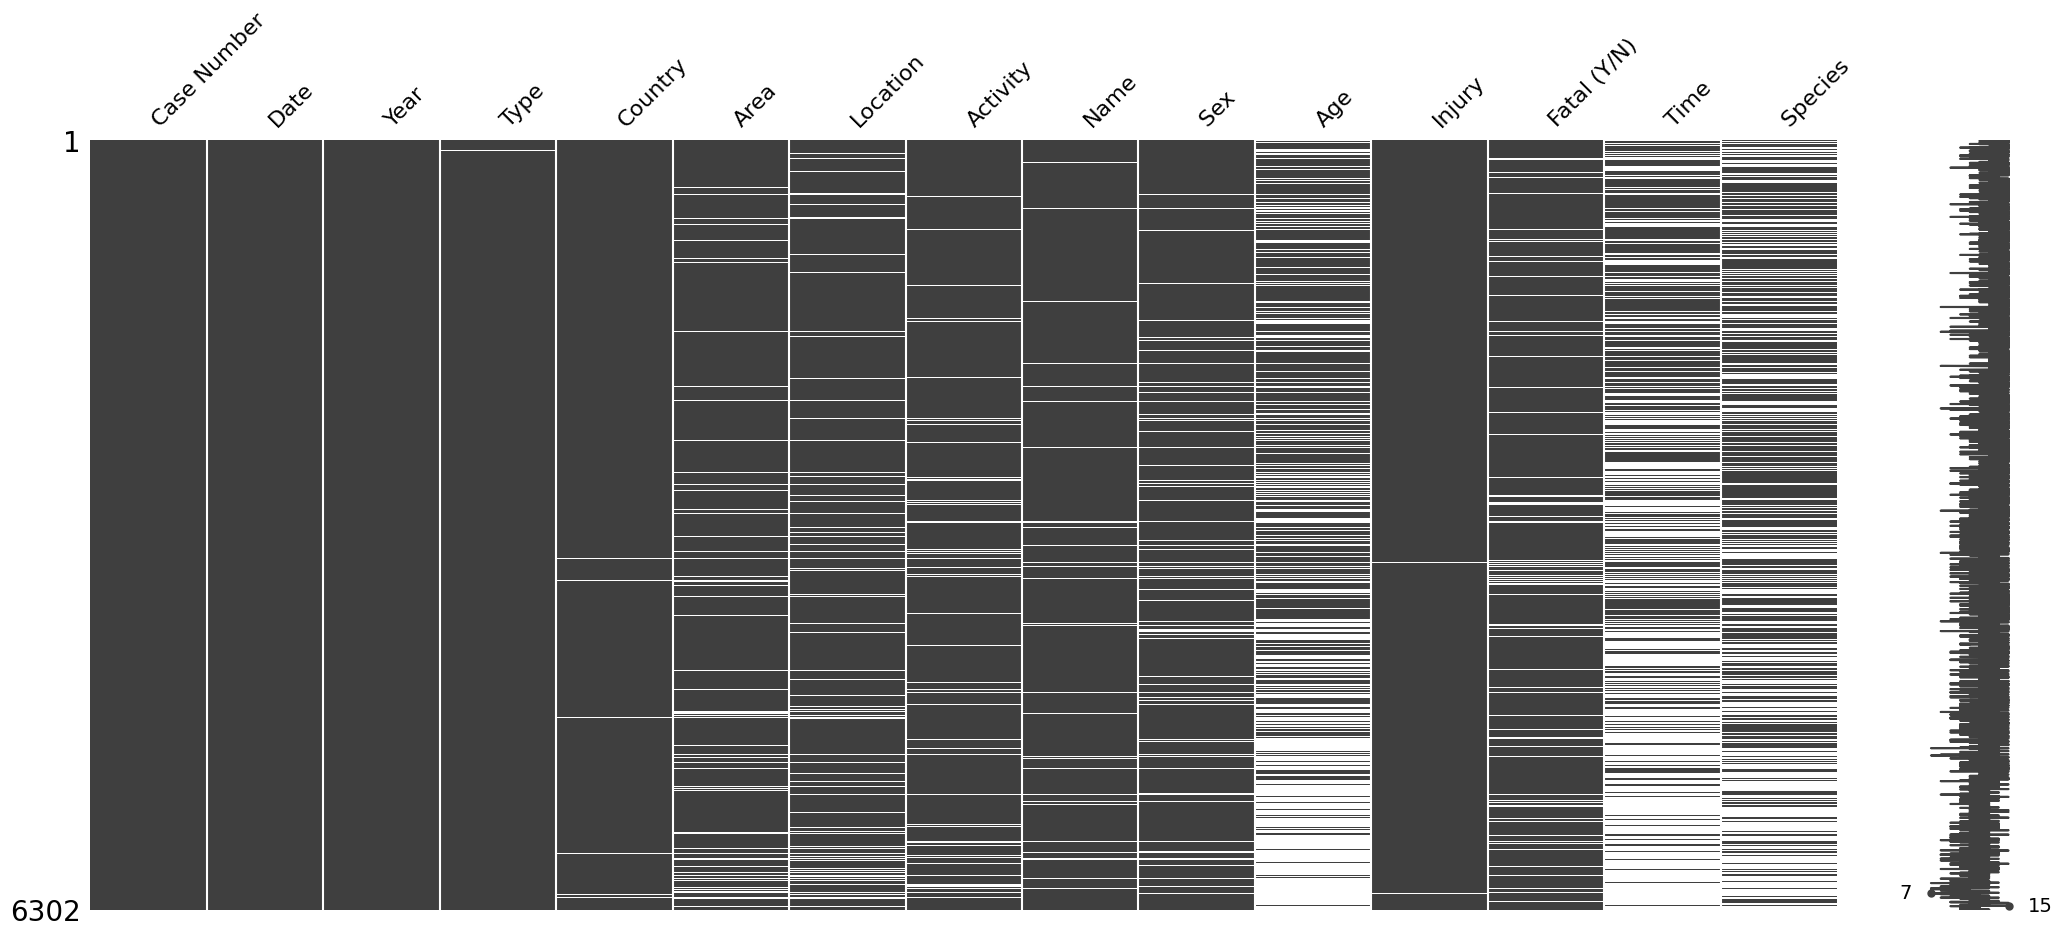

In [185]:
plot_missing_data(df_clean)

## 3.1 Manejo de Datos Faltantes

In [173]:
duplicados_absolutos = df.duplicated().sum()
duplicados_absolutos

np.int64(19411)

In [174]:
df.duplicated().sum()

np.int64(19411)

In [175]:

duplicados_por_id = df.duplicated(subset=["id"]).sum()
print("Duplicados totales:", duplicados_absolutos)
print("Duplicados por id:", duplicados_por_id)


KeyError: Index(['id'], dtype='object')

In [ ]:

# Eliminamos duplicados completos primero
df = df.drop_duplicates().copy()
# También nos aseguramos que cada 'id' sea único
df = df.drop_duplicates(subset=["id"]).copy()
df.shape


## 3. Detección y tratamiento de nulos

In [ ]:
df.isnull().sum()

In [ ]:

# Ejemplo: imputar nulos en 'ciudad' con 'Desconocido'
df["ciudad"] = df["ciudad"].fillna("Desconocido")

# Ejemplo: eliminar filas con fecha_contrato nula
df = df.dropna(subset=["fecha_contrato"])
df.isnull().sum()


## 4. Detección y manejo de outliers

In [ ]:

# Salario: revisar valores extremos
df["salario"].describe()


In [ ]:

# Podemos recortar valores de salario demasiado altos
q_low, q_high = df["salario"].quantile([0.01, 0.99])
df["salario"] = df["salario"].clip(lower=q_low, upper=q_high)
df["salario"].describe()


## 5. Transformaciones de columnas

In [ ]:

# Convertir columna fecha_contrato a datetime (invalid -> NaT)
df["fecha_contrato"] = pd.to_datetime(df["fecha_contrato"], errors="coerce")
df[["fecha_contrato"]].head()


In [ ]:

# Cambiar tipo de 'departamento' a categoría
df["departamento"] = df["departamento"].astype("category")
df.dtypes


In [ ]:

# Ejemplo extra 1: normalizar nombres a minúsculas
df["nombre"] = df["nombre"].str.lower()
df["apellido"] = df["apellido"].str.lower()
df[["nombre","apellido"]].head()


In [ ]:

# Ejemplo extra 2: crear columna año de la fecha
df["anio_contrato"] = df["fecha_contrato"].dt.year
df[["fecha_contrato","anio_contrato"]].head()


## 6. Binning de variables

In [ ]:

# Con pd.cut: agrupar edades
df["grupo_edad"] = pd.cut(df["edad"], bins=[17,29,49,69], labels=["joven","adulto","mayor"])
df[["edad","grupo_edad"]].head()


In [ ]:

# Con apply + lambda
df["rango_salario"] = df["salario"].apply(lambda x: "alto" if x>30000 else "bajo")
df[["salario","rango_salario"]].head()


## 7. Encoding de variables categóricas

In [ ]:

# Label encoding sencillo
df["departamento_code"] = df["departamento"].cat.codes
df[["departamento","departamento_code"]].head()


In [ ]:

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=["ciudad"])
df_encoded.head()


## 8. Feature Engineering

In [ ]:

# Crear margen = ventas - costes
df["margen"] = df["ventas"] - df["costes"]

# Crear beneficio relativo
df["beneficio_pct"] = (df["margen"] / df["ventas"]).round(2)

# Crear columna nombre_completo
df["nombre_completo"] = df["nombre"] + " " + df["apellido"]

# Crear variable booleana
df["es_joven"] = df["edad"] < 30

# Extraer mes del contrato
df["mes_contrato"] = df["fecha_contrato"].dt.month

df.head()
